In [1]:
#-----------------------Data Preprocessing----------------
import librosa
import os
import math
import json

import warnings
warnings.filterwarnings("ignore")

SAMPLE_RATE=22050
DURATION=2
SAMPLES_PER_TRACK=SAMPLE_RATE*DURATION

DATASET_PATH="../input/gunshot-audio-dataset"
JSON_PATH="./dataset_JSON.json"
def save_mfcc(dataset_path,json_path,num_segments,n_mfcc=13,n_fft=2048,hop_length=512):
    
    #dictonary to store data (Schema)
    data={
        #"mapping":[],
        "mfcc":[],
        "class label":[],
        "filename":[],
        "class name":[]
    }
    
    num_samples_per_segment=int(SAMPLES_PER_TRACK/num_segments)
    expected_num_mfcc_vectors_per_segment=math.ceil(num_samples_per_segment/hop_length) #1.2->2
    
    #loop through all the genres
    for i,(dirpath,dirnames,filenames) in enumerate(os.walk(dataset_path)):
        #ensure that we are not at root lebvel
        if dirpath is not dataset_path:
            #save the semantic label
            dirpath_components=dirpath.split("/") #genre/blues=>["genre","blues"]
            semantic_label=dirpath_components[-1] #take only "blues"
            
            #data["mapping"].append(semantic_label)
            #process files for a specific genre
            for f in filenames:
                #if(semantic_label!='M4'):
                fn=f.split("(")
                class_number=fn[0]
                filename=fn[1].split(")")
                filename=filename[0]
                #print(semantic_label)

                #load audio file
                file_path=os.path.join(dirpath,f)
                signal,sr=librosa.load(file_path,sr=SAMPLE_RATE)
                #process segments extracting mfcc and storing data
                for s in range(num_segments):
                    start_sample=num_samples_per_segment*s
                    finish_sample=start_sample+num_samples_per_segment
                    mfcc=librosa.feature.mfcc(signal[start_sample:finish_sample],
                                              sr=sr,n_fft=n_fft,n_mfcc=n_mfcc,hop_length=hop_length)
                    mfcc=mfcc.T
                    #store mfcc for segment if it has the expected length
                    if len(mfcc)==expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["class label"].append(class_number)
                        data["filename"].append(f)
                        data["class name"].append(semantic_label)
    
    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [2]:
save_mfcc(DATASET_PATH,JSON_PATH,num_segments=10)

In [3]:
import pandas as pd
df = pd.read_json('./dataset_JSON.json')
df

,mfcc,class label,filename,class name
0,"[[-277.9341735839844, 94.76202392578125, -36.4...",7,7 (66).wav,MG-42
1,"[[-50.51616668701172, 68.08103942871094, -9.34...",7,7 (66).wav,MG-42
2,"[[-66.3523941040039, 65.97320556640625, -13.60...",7,7 (66).wav,MG-42
3,"[[-282.0679016113281, 117.27705383300781, -46....",7,7 (66).wav,MG-42
4,"[[-61.510616302490234, 68.50846862792969, -2.4...",7,7 (66).wav,MG-42
...,...,...,...,...
8005,"[[34.28015899658203, 65.84837341308594, 0.6919...",3,3 (27).wav,AK-12
8006,"[[-107.29753875732422, 46.54408264160156, -4.7...",3,3 (27).wav,AK-12
8007,"[[12.465103149414062, 58.459259033203125, 12.7...",3,3 (27).wav,AK-12
8008,"[[-228.27723693847656, 118.24240112304688, -21...",3,3 (27).wav,AK-12


In [4]:
print(sorted(df["class label"].unique()))
print(sorted(df["class name"].unique()))
#df[df["class label"]==df["class label"].unique()[3]]

[1, 2, 3, 4, 5, 6, 7, 8, 9]
['AK-12', 'AK-47', 'IMI Desert Eagle', 'M16', 'M249', 'M4', 'MG-42', 'MP5', 'Zastava M92']


In [5]:
df=df.replace(6,4)
df=df.replace('M4','M16')
print(sorted(df["class label"].unique()))
print(sorted(df["class name"].unique()))

[1, 2, 3, 4, 5, 7, 8, 9]
['AK-12', 'AK-47', 'IMI Desert Eagle', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']


In [6]:
df=df.replace(7,6)
df=df.replace(8,7)
df=df.replace(9,8)

In [7]:
print(sorted(df["class label"].unique()))
print(sorted(df["class name"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8]
['AK-12', 'AK-47', 'IMI Desert Eagle', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']


In [8]:
df

,mfcc,class label,filename,class name
0,"[[-277.9341735839844, 94.76202392578125, -36.4...",6,7 (66).wav,MG-42
1,"[[-50.51616668701172, 68.08103942871094, -9.34...",6,7 (66).wav,MG-42
2,"[[-66.3523941040039, 65.97320556640625, -13.60...",6,7 (66).wav,MG-42
3,"[[-282.0679016113281, 117.27705383300781, -46....",6,7 (66).wav,MG-42
4,"[[-61.510616302490234, 68.50846862792969, -2.4...",6,7 (66).wav,MG-42
...,...,...,...,...
8005,"[[34.28015899658203, 65.84837341308594, 0.6919...",3,3 (27).wav,AK-12
8006,"[[-107.29753875732422, 46.54408264160156, -4.7...",3,3 (27).wav,AK-12
8007,"[[12.465103149414062, 58.459259033203125, 12.7...",3,3 (27).wav,AK-12
8008,"[[-228.27723693847656, 118.24240112304688, -21...",3,3 (27).wav,AK-12


In [9]:
a=[]
train=[]
validation=[]
test=[]
sum=0
for i in (sorted(df["class label"].unique())):
    j=i-1
    a.append(df.loc[df["class label"] == i])

    sum=sum+len(a[j])

    required_length=math.ceil(0.2*len(a[j]))
    required_length=int(required_length-math.fmod(required_length, 10))
    #print('training no of samples class-',i,'-->',required_length)

    print(i,'. total--->',len(a[j]),
          'train--->',3*required_length,
          'validation--->',(required_length),
          'test--->',(len(a[j])-4*required_length))

    train.append(a[j][0:3*required_length])
    validation.append(a[j][3*required_length:4*required_length])
    test.append(a[j][4*required_length:])


    if j!=0:
        #print(i)
        train[j]=pd.concat([train[j],train[j-1]])
        test[j]=pd.concat([test[j],test[j-1]])
        validation[j]=pd.concat([validation[j],test[j-1]])
        #print('joined ', j,' with ',j+1)

train=train[7]
test=test[7]
validation=validation[7]
#print(sum)

1 . total---> 720 train---> 420 validation---> 140 test---> 160
2 . total---> 1000 train---> 600 validation---> 200 test---> 200
3 . total---> 840 train---> 480 validation---> 160 test---> 200
4 . total---> 1990 train---> 1170 validation---> 390 test---> 430
5 . total---> 1000 train---> 600 validation---> 200 test---> 200
6 . total---> 1000 train---> 600 validation---> 200 test---> 200
7 . total---> 1000 train---> 600 validation---> 200 test---> 200
8 . total---> 460 train---> 270 validation---> 90 test---> 100


In [10]:
print(df["class label"].unique())

[6 5 7 4 8 2 1 3]


In [11]:
#while considering only 2 clases

a=[]
train=[]
validation=[]
test=[]
sum=0


a.append(df.loc[df["class label"] == 4])
a.append(df.loc[df["class label"] == 5])

sum=sum+len(a[0])+len(a[1])

j=0
required_length=math.ceil(0.2*len(a[j]))
required_length=int(required_length-math.fmod(required_length, 10))
#print('training no of samples class-',i,'-->',required_length)

j=0
print('0','. total--->',len(a[j]),
      'train--->',3*required_length,
      'validation--->',(required_length),
      'test--->',(len(a[j])-4*required_length))

train.append(a[j][0:3*required_length])
validation.append(a[j][3*required_length:4*required_length])
test.append(a[j][4*required_length:])

j=1

required_length=math.ceil(0.2*len(a[j]))
required_length=int(required_length-math.fmod(required_length, 10))

print('1','. total--->',len(a[j]),
      'train--->',3*required_length,
      'validation--->',(required_length),
      'test--->',(len(a[j])-4*required_length))

train.append(a[j][0:3*required_length])
validation.append(a[j][3*required_length:4*required_length])
test.append(a[j][4*required_length:])

    
if j!=0:
    #print(i)
    train[j]=pd.concat([train[j],train[j-1]])
    test[j]=pd.concat([test[j],test[j-1]])
    validation[j]=pd.concat([validation[j],test[j-1]])
    #print('joined ', j,' with ',j+1)

train=train[1]
test=test[1]
validation=validation[1]
#print(sum)

0 . total---> 1990 train---> 1170 validation---> 390 test---> 430
1 . total---> 1000 train---> 600 validation---> 200 test---> 200


In [12]:
train.sample(frac=1)
validation.sample(frac=1)
test.sample(frac=1)

X_train=train.iloc[:,0].values
y_train=train.iloc[:,-3].values
print(X_train.shape,type(X_train),len(X_train[0]),type(X_train[0]))

X_validation=validation.iloc[:,0].values
y_validation=validation.iloc[:,-3].values

X_test=test.iloc[:,0].values
y_test=test.iloc[:,-3].values

y_train=y_train-1
y_validation=y_validation-1
y_test=y_test-1

#print(X_train.shape)

import numpy as np
X_train=np.array(X_train.tolist())
X_validation=np.array(X_validation.tolist())
X_test=np.array(X_test.tolist())

print(X_train.shape,type(X_train),X_train[0].shape,type(X_train[0]))

(1770,) <class 'numpy.ndarray'> 9 <class 'list'>
(1770, 9, 13) <class 'numpy.ndarray'> (9, 13) <class 'numpy.ndarray'>


In [13]:
from sklearn import preprocessing

print(X_train.shape)
nsamplestr, nxtr, nytr = X_train.shape
#print(nsamplestr, nxtr, nytr)
X_train = X_train.reshape((nsamplestr,nxtr*nytr))
print(X_train.shape)

nsampleste, nxte, nyte = X_test.shape
X_test = X_test.reshape((nsampleste,nxte*nyte))

nsamplesv, nxv, nyv = X_validation.shape
X_validation = X_validation.reshape((nsamplesv,nxv*nyv))

scaler=preprocessing.StandardScaler().fit(X_train)
print(scaler.n_samples_seen_)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_validation_scaled=scaler.transform(X_validation)
print(X_train_scaled.shape)

X_train_scaled = X_train_scaled.reshape((nsamplestr,nxtr,nytr))
X_test_scaled = X_test_scaled.reshape((nsampleste,nxte,nyte))
X_validation_scaled = X_validation_scaled.reshape((nsamplesv,nxv,nyv))

print(X_train_scaled.shape)

(1770, 9, 13)
(1770, 117)
1770
(1770, 117)
(1770, 9, 13)


In [14]:
#hidden_nodes = int(2/3 * ( (X_train_scaled.shape[1] * X_train_scaled.shape[2]) + 9))
alpha=2
hidden_nodes = int(X_train_scaled.shape[0]/(alpha*(X_train_scaled.shape[1] * X_train_scaled.shape[2]) + 9))
print('hidden_nodes: ',hidden_nodes)
    
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

# model.metrics_names.append("gradient_norm")
# model.metrics.append(get_gradient_norm_func(model))

# You can compute the norm within the usual training routine
# loss, acc, gradient_norm = model.train_on_batch(batch, label)


input_shape=(X_train_scaled.shape[1],X_train_scaled.shape[2]) 
#build network topology
model=keras.Sequential()

model.add(keras.layers.Dense(64,activation='relu',input_shape=input_shape))

model.add(keras.layers.LSTM(8,return_sequences=True,
                            kernel_regularizer=keras.regularizers.l1(0.01)))
          
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(8,kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(8,activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.8,
    staircase=True)

checkpoint_filepath = './checkpoint'

mcp_save = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max')

optimizer=keras.optimizers.Adam(learning_rate=lr_schedule)#, clipnorm=0.001)#,gradient_transformers=[AutoClipper(10)])
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
model.summary()

hidden_nodes:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9, 64)             896       
_________________________________________________________________
lstm (LSTM)                  (None, 9, 8)              2336      
_________________________________________________________________
dropout (Dropout)            (None, 9, 8)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)

In [15]:
# y_train = y_train.reshape((-1,1))
# y_test = y_test.reshape((-1,1))

In [16]:
# import tensorflow as tf

#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.enable_eager_execution()


import keras.backend as K
# get_gradient = get_gradient_norm_func(model)
history = model.fit(X_train_scaled,y_train,
                    validation_data=(X_validation_scaled, y_validation),
                    callbacks=[mcp_save],
                    batch_size=8,epochs=125)

# print(get_gradient([X_train_scaled,y_train, np.ones(len(y_train))]))

# #train model
# history = model.fit(X_train_scaled,y_train,
#                     validation_data=(X_validation_scaled, y_validation),
#                     callbacks=[mcp_save],
#                     batch_size=8,epochs=125) #validation_data=(X_test,y_test)

model.load_weights(checkpoint_filepath)
model.evaluate(X_test_scaled,y_test)

Epoch 1/125
222/222 [==============================] - 7s 8ms/step - loss: 2.4464 - accuracy: 0.5559 - val_loss: 0.9213 - val_accuracy: 0.6825
Epoch 2/125
222/222 [==============================] - 1s 6ms/step - loss: 0.7825 - accuracy: 0.6412 - val_loss: 0.6557 - val_accuracy: 0.6825
Epoch 3/125
222/222 [==============================] - 1s 6ms/step - loss: 0.6893 - accuracy: 0.6446 - val_loss: 0.6488 - val_accuracy: 0.6825
Epoch 4/125
222/222 [==============================] - 1s 6ms/step - loss: 0.6662 - accuracy: 0.6508 - val_loss: 0.6343 - val_accuracy: 0.6825
Epoch 5/125
222/222 [==============================] - 1s 6ms/step - loss: 0.6561 - accuracy: 0.6599 - val_loss: 0.6328 - val_accuracy: 0.6825
Epoch 6/125
222/222 [==============================] - 1s 6ms/step - loss: 0.6499 - accuracy: 0.6576 - val_loss: 0.6286 - val_accuracy: 0.6825
Epoch 7/125
222/222 [==============================] - 1s 6ms/step - loss: 0.6525 - accuracy: 0.6605 - val_loss: 0.6321 - val_accuracy: 0.6825

[0.628348708152771, 0.682539701461792]

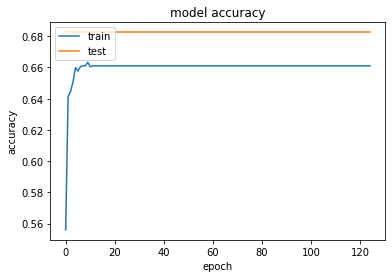

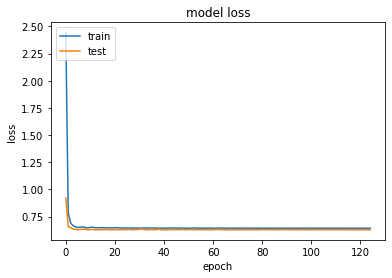

In [17]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
predictions=[]
for i in range(len(X_test)):
    predictions.append(np.argmax(model.predict(X_test_scaled)[i])+1)

test['prediction']=predictions
test.describe()

import sklearn
sklearn.metrics.f1_score(test['class label'], test['prediction'],average='micro')

0.6825396825396826

In [24]:
# import sklearn
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# labels=['Zastava M92','MP5','MG-42','M249','M16','M4','AK-12','IMI Desert Eagle','AK-47']
# labels.reverse()

# print(labels)
# cm=sklearn.metrics.confusion_matrix(test['class label'], test['prediction'])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
# fig, ax = plt.subplots(figsize=(8,10))
# disp.plot(ax=ax)

Epoch 1/100
222/222 [==============================] - 3s 8ms/step - loss: 0.6427 - accuracy: 0.6610 - val_loss: 0.6282 - val_accuracy: 0.6825
Epoch 2/100
222/222 [==============================] - 1s 6ms/step - loss: 0.6435 - accuracy: 0.6610 - val_loss: 0.6287 - val_accuracy: 0.6825
Epoch 3/100
222/222 [==============================] - 1s 6ms/step - loss: 0.6431 - accuracy: 0.6610 - val_loss: 0.6282 - val_accuracy: 0.6825
Epoch 4/100
222/222 [==============================] - 1s 6ms/step - loss: 0.6431 - accuracy: 0.6610 - val_loss: 0.6280 - val_accuracy: 0.6825
Epoch 5/100
222/222 [==============================] - 1s 6ms/step - loss: 0.6431 - accuracy: 0.6610 - val_loss: 0.6283 - val_accuracy: 0.6825
Epoch 6/100
222/222 [==============================] - 1s 6ms/step - loss: 0.6429 - accuracy: 0.6610 - val_loss: 0.6283 - val_accuracy: 0.6825
Epoch 7/100
222/222 [==============================] - 1s 6ms/step - loss: 0.6432 - accuracy: 0.6610 - val_loss: 0.6283 - val_accuracy: 0.6825

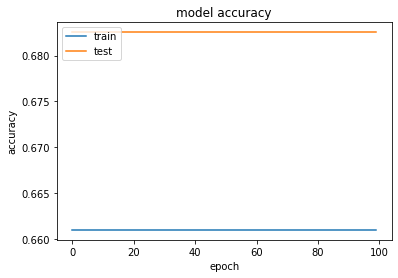

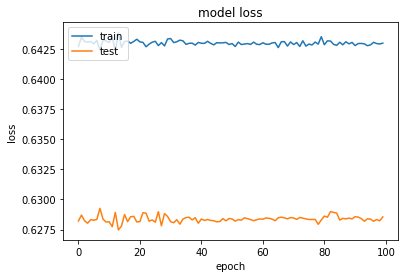

Evaluate on test data
630/630 [==============================] - 2s 3ms/step - loss: 0.6285 - accuracy: 0.6825
test loss, test acc: [0.6285449266433716, 0.682539701461792]


In [20]:
model.save('partly_trained2.h5')

#Load partly trained model
from keras.models import load_model
model = load_model('partly_trained2.h5')

#Continue training
history=model.fit(X_train_scaled,y_train,validation_data=(X_validation_scaled, y_validation),batch_size=8,epochs=100)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_scaled, y_test, batch_size=1)
print("test loss, test acc:", results)

In [ ]:
model.save('partly_trained3.h5')

#Load partly trained model
from keras.models import load_model
model = load_model('partly_trained3.h5')

#Continue training
history=model.fit(X_train_scaled,y_train,validation_data=(X_validation_scaled, y_validation),batch_size=8,epochs=200)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_scaled, y_test, batch_size=1)
print("test loss, test acc:", results)

In [21]:
predictions=[]
for i in range(len(X_test)):
    predictions.append(np.argmax(model.predict(X_test_scaled)[i])+1)

test['prediction']=predictions
test.describe()

import sklearn
sklearn.metrics.f1_score(test['class label'], test['prediction'],average='micro')

0.6825396825396826

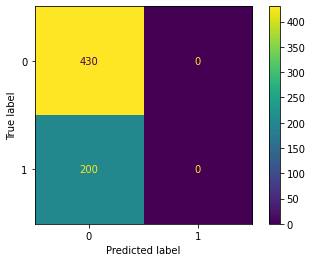

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=sklearn.metrics.confusion_matrix(test['class label'], test['prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Before merging
0.6825396825396826
After merging
0.6825396825396826
-------------------------------------------------


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (9).

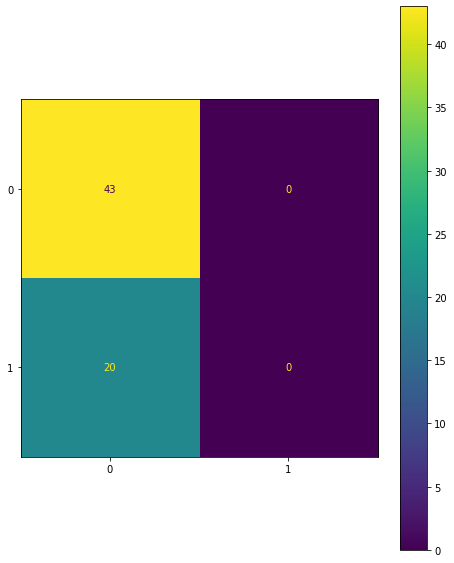

In [23]:
# import sklearn

# #def f1_calculater(model,model_name):
# #mypreds=model.predict(X_test_scaled)
# #test['prediction']=mypreds+1
# #print(model_name,': ')
# print('Before merging')
# print(sklearn.metrics.f1_score(test['class label'], test['prediction'],average='micro'))

# list=[]
# i=0
# for f in (test["filename"].unique()):
#     list.append(test.loc[test['filename'] == f])
#     i=i+1

# df_results=pd.DataFrame(columns=['filename','class name','true label','prediction'])

# for i in range(len(list)):
#     temp=list[i]['prediction'].tolist()
#     final=max(temp,key=temp.count)
#     df_results=df_results.append({'filename':list[i].values[0][2],
#                        'class name':list[i].values[0][3],
#                        'true label':list[i].values[0][1],
#                        'prediction':final},ignore_index=True)

# a=np.array(df_results['true label'].astype('int64'))
# b=np.array(df_results['prediction'].astype('int64'))

# print('After merging')
# print(sklearn.metrics.f1_score(a,b,average='micro'))
# print('-------------------------------------------------')

# cm=sklearn.metrics.confusion_matrix(a,b)
# # disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df_results['class name'])
# # disp.plot()
# # plt.show()

# # cm=sklearn.metrics.confusion_matrix(test['class label'], test['prediction'])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
# fig, ax = plt.subplots(figsize=(8,10))
# disp.plot(ax=ax)

# del test['prediction']

In [ ]:
# np.unique['df_results']

In [ ]:
# df_results